In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [3]:
## Data is avg lab_result by cid
df = pd.read_csv('data/lab_blood_dob.csv')
display(df)

,CID,avg_labresult,ABOGROUP,BIRTH
0,0000CC6787580,7.0,9.0,19680601.0
1,0090011285541,5.8,9.0,19740903.0
2,0090011318155,6.7,9.0,19680410.0
3,0090011357509,9.0,9.0,19791213.0
4,0090011375027,10.1,9.0,19780405.0
...,...,...,...,...
15257,8950300002537,5.5,9.0,19551122.0
15258,8950300002685,7.4,9.0,19510108.0
15259,8959900000011,5.7,9.0,19290101.0
15260,9977400090869,6.1,9.0,19520101.0


In [4]:
df_cleaned = df[(df.ABOGROUP.notnull()) & (df.ABOGROUP != 9) & (df.ABOGROUP != np.nan)].reset_index(drop=True)
blood_code = {1.0:'A', 2.0:'B', 3:'AB', 4:'O'}
df_cleaned['ABOGROUP'] = df_cleaned['ABOGROUP'].map(blood_code)
df_cleaned

,CID,avg_labresult,ABOGROUP,BIRTH
0,0090121016404,5.3,B,19890315.0
1,0090801061032,9.4,O,19680101.0
2,1103700465804,6.5,O,19910517.0
3,1199900011152,7.0,O,19840409.0
4,1250300013325,6.1,AB,19851231.0
...,...,...,...,...
3780,5969999019679,6.7,AB,19761228.0
3781,6015601276080,10.0,O,19701111.0
3782,8502087002364,6.3,O,19780512.0
3783,8570784009334,6.5,O,19250701.0


In [5]:
count_df = df_cleaned[(df_cleaned.avg_labresult <= 15) & (df_cleaned.avg_labresult > 0)].groupby('ABOGROUP')['avg_labresult'].count().reset_index()
count_df.columns = ['Blood Group', 'Count']
display(count_df)

,Blood Group,Count
0,A,347
1,AB,145
2,B,645
3,O,2612


In [6]:
grouped_df = df_cleaned[(df_cleaned.avg_labresult <= 15) & (df_cleaned.avg_labresult > 0)].groupby('ABOGROUP').agg(np.mean)['avg_labresult'].reset_index()
grouped_df.columns = ['Blood Group', 'HbA1C (mean)']
display(grouped_df)

C:\Users\User\AppData\Local\Temp\ipykernel_18284\923558250.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = df_cleaned[(df_cleaned.avg_labresult <= 15) & (df_cleaned.avg_labresult > 0)].groupby('ABOGROUP').agg(np.mean)['avg_labresult'].reset_index()


,Blood Group,HbA1C (mean)
0,A,7.321902
1,AB,7.233034
2,B,7.282031
3,O,7.231842


In [7]:
join_df = count_df.merge(grouped_df, on='Blood Group', how='inner')
display(join_df)

,Blood Group,Count,HbA1C (mean)
0,A,347,7.321902
1,AB,145,7.233034
2,B,645,7.282031
3,O,2612,7.231842


Text(0, 0.5, 'HbA1C level')

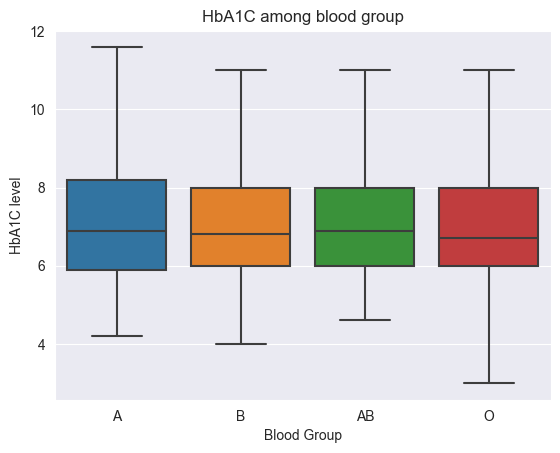

In [8]:
sns.set_style('darkgrid')
sns.boxplot(data=df_cleaned[(df_cleaned.avg_labresult <= 15) & (df_cleaned.avg_labresult > 0)], x='ABOGROUP', y='avg_labresult', showfliers=False, order=['A','B','AB','O'])
plt.title("HbA1C among blood group")
plt.xlabel("Blood Group")
plt.ylabel("HbA1C level")

In [9]:
import pingouin as pg

# Perform multi-way ANOVA
aov = pg.anova(data=df_cleaned[(df_cleaned.avg_labresult <= 15) & (df_cleaned.avg_labresult > 0)], dv='avg_labresult', between=['ABOGROUP'])

# Print the ANOVA results
print(aov)

     Source  ddof1  ddof2         F     p-unc       np2
0  ABOGROUP      3   3745  0.328326  0.804886  0.000263


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pingouin\parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  sserror = grp.apply(lambda x: (x - x.mean()) ** 2).sum()
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


,W,pval,normal
avg_labresult,0.893757,4.203895e-45,False


<AxesSubplot: title={'center': 'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

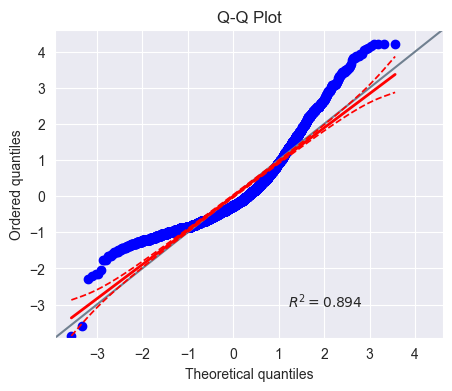

In [10]:
normality = pg.normality(df_cleaned[(df_cleaned.avg_labresult <= 15) & (df_cleaned.avg_labresult > 0)]['avg_labresult'])

# Print the normality test results
display(normality)
pg.qqplot(df_cleaned[(df_cleaned.avg_labresult <= 15) & (df_cleaned.avg_labresult > 0)]['avg_labresult'])

In [11]:
kruskal = pg.kruskal(data=df_cleaned[(df_cleaned.avg_labresult <= 15) & (df_cleaned.avg_labresult > 0)], dv='avg_labresult', between='ABOGROUP')

# Print the Kruskal-Wallis test results
print(kruskal)

           Source  ddof1        H     p-unc
Kruskal  ABOGROUP      3  0.85001  0.837472


In [12]:
# Perform multiple comparisons between ABOGROUP levels
gameshowell = pg.pairwise_gameshowell(data=df_cleaned[(df_cleaned.avg_labresult <= 15) & (df_cleaned.avg_labresult > 0)], dv='avg_labresult', between='ABOGROUP')

# Print the multiple comparisons results
display(gameshowell)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,A,AB,7.321902,7.233034,0.088868,0.179867,0.494074,304.893269,0.960371,0.048782
1,A,B,7.321902,7.282031,0.039871,0.129174,0.308661,667.538430,0.989797,0.020534
2,A,O,7.321902,7.231842,0.090061,0.112439,0.800973,427.713166,0.853949,0.045754
3,AB,B,7.233034,7.282031,-0.048997,0.162220,-0.302037,223.111942,0.990407,-0.027733
4,AB,O,7.233034,7.231842,0.001193,0.149238,0.007994,162.081267,1.000000,0.000682
5,B,O,7.282031,7.231842,0.050190,0.081276,0.617517,977.236436,0.926504,0.027145


starting Project 2

In [13]:
df_dob = df_cleaned.copy()
df_dob.BIRTH = df_dob.BIRTH.astype(int)

In [14]:
df_dob.BIRTH = pd.to_datetime(df_dob.BIRTH, format='%Y%m%d')
df_dob['weekday'] = df_dob.BIRTH.dt.weekday
df_dob['month'] = df_dob.BIRTH.dt.month_name()

In [15]:
day_of_week = {0:'monday', 1:'tuesday', 2:'wednesday', 3:'thursday', 4:'friday', 5:'saturday', 6:'sunday'}
df_dob['weekday'] = df_dob['weekday'].map(day_of_week)

In [16]:
df_dob

,CID,avg_labresult,ABOGROUP,BIRTH,weekday,month
0,0090121016404,5.3,B,1989-03-15,wednesday,March
1,0090801061032,9.4,O,1968-01-01,monday,January
2,1103700465804,6.5,O,1991-05-17,friday,May
3,1199900011152,7.0,O,1984-04-09,monday,April
4,1250300013325,6.1,AB,1985-12-31,tuesday,December
...,...,...,...,...,...,...
3780,5969999019679,6.7,AB,1976-12-28,tuesday,December
3781,6015601276080,10.0,O,1970-11-11,wednesday,November
3782,8502087002364,6.3,O,1978-05-12,friday,May
3783,8570784009334,6.5,O,1925-07-01,wednesday,July


Text(0, 0.5, 'HbA1C level')

<Figure size 640x480 with 0 Axes>

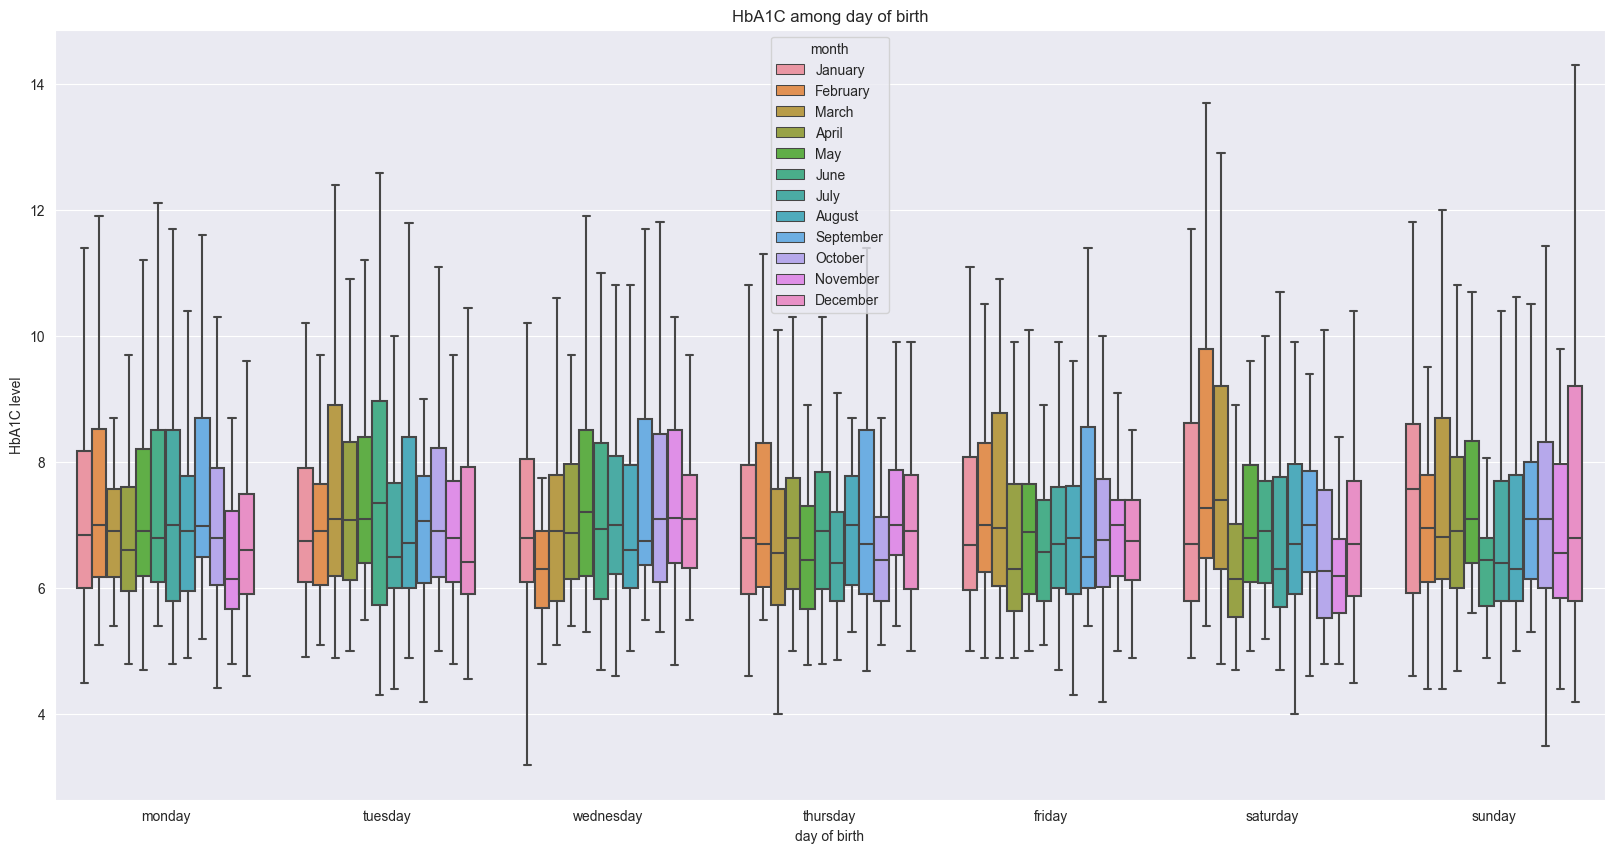

In [17]:
df_dob['ABOGROUP'] = df_dob['ABOGROUP'].astype('category')
df_dob['ABOGROUP'] = df_dob['ABOGROUP'].cat.reorder_categories(['A','B','AB','O'])
df_dob['month'] = df_dob['month'].astype('category')
df_dob['month'] = df_dob['month'].cat.reorder_categories(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

plt.clf()
plt.figure(figsize=(20,10))
sns.boxplot(data=df_dob[(df_dob.avg_labresult <= 15) & (df_dob.avg_labresult > 0)], x='weekday', y='avg_labresult', hue='month', showfliers=False, order=['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'])
plt.title("HbA1C among day of birth")
plt.xlabel("day of birth")
plt.ylabel("HbA1C level")

In [18]:
normality_day = pg.normality(df_dob[(df_dob.avg_labresult <= 15) & (df_dob.avg_labresult > 0)]['avg_labresult'])

# Print the normality test results
display(normality_day)

,W,pval,normal
avg_labresult,0.893757,4.203895e-45,False


In [19]:
kruskal_day = pg.kruskal(data=df_dob[(df_dob.avg_labresult <= 15) & (df_dob.avg_labresult > 0)], dv='avg_labresult', between='month')

# Print the Kruskal-Wallis test results
print(kruskal_day)

        Source  ddof1          H     p-unc
Kruskal  month     11  20.787647  0.035639


In [20]:
# Perform multiple comparisons between ABOGROUP levels
gameshowell_day = pg.pairwise_gameshowell(data=df_dob[(df_dob.avg_labresult <= 15) & (df_dob.avg_labresult > 0)], dv='avg_labresult', between='month')
tukey = pg.pairwise_tukey(data=df_dob[(df_dob.avg_labresult <= 15) & (df_dob.avg_labresult > 0)], dv='avg_labresult', between='month')

# Print the multiple comparisons results
display(gameshowell_day)
display(tukey)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pingouin\parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  sserror = grp.apply(lambda x: (x - x.mean()) ** 2).sum()


,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,March,January,7.449556,7.312889,0.136667,0.142893,0.956435,567.943314,0.998445,0.070432
1,March,May,7.449556,7.362591,0.086965,0.159534,0.545118,587.242945,0.999994,0.044680
2,March,April,7.449556,7.100968,0.348589,0.157168,2.217938,565.949100,0.537224,0.185285
3,March,December,7.449556,7.182046,0.267510,0.160587,1.665823,549.999808,0.882886,0.141880
4,March,October,7.449556,7.209964,0.239592,0.165123,1.450992,569.778355,0.952617,0.121215
...,...,...,...,...,...,...,...,...,...,...
61,February,July,7.375325,7.088184,0.287142,0.144841,1.982462,450.354999,0.705224,0.154185
62,February,September,7.375325,7.453779,-0.078453,0.169153,-0.463802,503.452845,0.999999,-0.041115
63,June,July,7.240982,7.088184,0.152798,0.134530,1.135791,546.527094,0.992943,0.085158
64,June,September,7.240982,7.453779,-0.212797,0.160413,-1.326559,530.473241,0.975418,-0.114363


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,March,January,7.449556,7.312889,0.136667,0.135805,1.006349,0.997591,0.074107
1,March,May,7.449556,7.362591,0.086965,0.151205,0.575146,0.999990,0.047142
2,March,April,7.449556,7.100968,0.348589,0.154117,2.261837,0.504363,0.188952
3,March,December,7.449556,7.182046,0.267510,0.157136,1.702411,0.867495,0.144996
4,March,October,7.449556,7.209964,0.239592,0.154117,1.554608,0.924873,0.129871
...,...,...,...,...,...,...,...,...,...
61,February,July,7.375325,7.088184,0.287142,0.143438,2.001855,0.692336,0.155693
62,February,September,7.375325,7.453779,-0.078453,0.163570,-0.479632,0.999998,-0.042518
63,June,July,7.240982,7.088184,0.152798,0.138272,1.105052,0.994521,0.082853
64,June,September,7.240982,7.453779,-0.212797,0.159060,-1.337843,0.974168,-0.115336


In [21]:
df_ml = df_dob[(df_dob.avg_labresult <= 15) & (df_dob.avg_labresult > 0)][['avg_labresult', 'ABOGROUP', 'weekday', 'month']]

In [22]:
df_ml

,avg_labresult,ABOGROUP,weekday,month
0,5.3,B,wednesday,March
1,9.4,O,monday,January
2,6.5,O,friday,May
3,7.0,O,monday,April
4,6.1,AB,tuesday,December
...,...,...,...,...
3780,6.7,AB,tuesday,December
3781,10.0,O,wednesday,November
3782,6.3,O,friday,May
3783,6.5,O,wednesday,July


In [23]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [24]:
# One-hot encode the categorical features
df_ml = pd.get_dummies(df_ml, columns=['ABOGROUP', 'weekday', 'month'])

# Split the data into training and test sets
X = df_ml.drop(columns=['avg_labresult'])
y = df_ml['avg_labresult']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Create a XGBoost regressor object
xg_reg = xgb.XGBRegressor(objective='reg:squarederror')

# Define the grid of hyperparameters to search
param_grid = {'max_depth': [3, 5, 7],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [100, 200, 300]}

# Create a GridSearchCV object
grid_search = GridSearchCV(xg_reg, param_grid, cv=5, scoring='neg_mean_squared_error')


In [26]:
# Fit the GridSearchCV object on the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [27]:
xg_reg_fine = xgb.XGBRegressor(objective='reg:linear', learning_rate=0.1, max_depth=3, n_estimators=100)

In [28]:
xg_reg_fine.fit(X_train, y_train)
y_pred = xg_reg_fine.predict(X_test)

[22:32:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [29]:
mse = mean_squared_error(y_test, y_pred)
display("Mean Squared Error: ", mse)

'Mean Squared Error: '

3.3512971687858437

In [30]:
xg_reg_all = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.1, max_depth=3, n_estimators=100)
xg_reg_all.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [31]:
new_data = {'ABOGROUP_A': [1,0], 'ABOGROUP_AB': [0,0], 'ABOGROUP_B': [0,0], 'ABOGROUP_O': [0,1], 'weekday_friday': [0,0], 'weekday_monday': [0,1], 'weekday_saturday': [1,0], 'weekday_sunday': [0,0], 'weekday_thursday': [0,0], 'weekday_tuesday': [0,0], 'weekday_wednesday': [0,0], 'month_April': [0,1], 'month_August': [0,0], 'month_December': [0,0], 'month_February': [1,0], 'month_January': [0,0], 'month_July': [0,0], 'month_June': [0,0], 'month_March' : [0,0], 'month_May': [0,0], 'month_November': [0,0], 'month_October' : [0,0], 'month_September': [0,0]}

new_data_df = pd.DataFrame.from_dict(new_data)

col_order = X.columns
new_data_df = new_data_df[col_order]

# Make a prediction
prediction = xg_reg_all.predict(new_data_df)
print("Predicted avg_labresult: ", prediction)

Predicted avg_labresult:  [8.114191 7.113484]


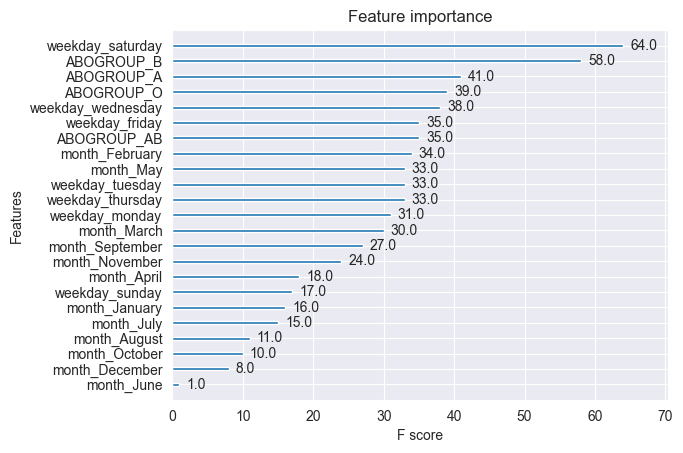

In [32]:
xgb.plot_importance(xg_reg_all, max_num_features=30)
plt.show()

Text(0.5, 0, 'relative importance')

<Figure size 640x480 with 0 Axes>

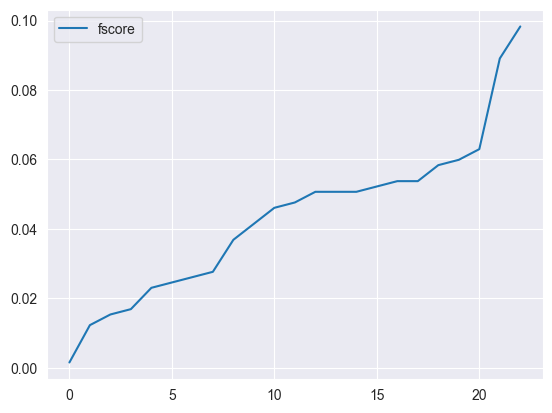

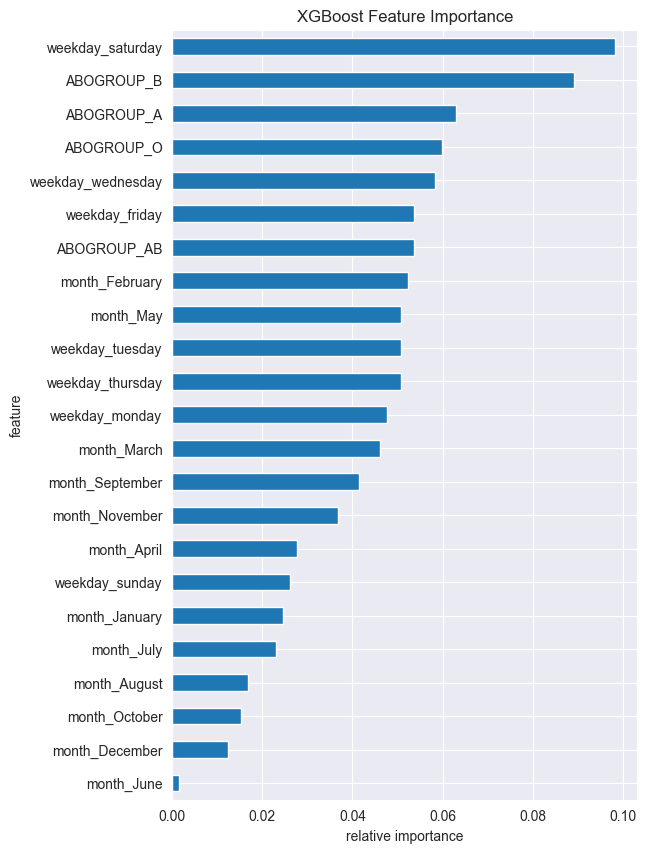

In [33]:
# Get feature importance values
importance = xg_reg_all.get_booster().get_score(importance_type='weight')
importance = sorted(importance.items(), key=lambda x: x[1])

# Plot feature importance
df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()

plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')

In [34]:
# import pickle

# with open('hba1c_model.pkl', 'wb') as f:
#     pickle.dump(xg_reg_all, f)